<a href="https://colab.research.google.com/github/AnujaS75/Machine-Learning-/blob/main/crypocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/dogecoin_1h.csv')

In [ ]:
df.head()

,Date,open,high,low,close,volume,tradecount,hour,day,month
0,21-09-2023 22:00,0.06136,0.06142,0.06123,0.06142,432656,994,22,3,9
1,21-09-2023 23:00,0.06142,0.06150,0.06127,0.06131,621986,1200,23,3,9
2,22-09-2023 00:00,0.06130,0.06156,0.06058,0.06155,2755402,6784,0,4,9
3,22-09-2023 01:00,0.06154,0.06167,0.06131,0.06162,554889,1640,1,4,9
4,22-09-2023 02:00,0.06163,0.06169,0.06149,0.06149,315523,939,2,4,9


In [ ]:
df.tail()

,Date,open,high,low,close,volume,tradecount,hour,day,month
995,02-11-2023 09:00,0.07033,0.07047,0.06970,0.06987,5322722,7526,9,3,11
996,02-11-2023 10:00,0.06986,0.07049,0.06952,0.06967,7081587,9719,10,3,11
997,02-11-2023 11:00,0.06966,0.06973,0.06919,0.06943,4185287,5847,11,3,11
998,02-11-2023 12:00,0.06943,0.06960,0.06914,0.06935,2909523,4733,12,3,11
999,02-11-2023 13:00,0.06935,0.06952,0.06846,0.06883,5159211,7805,13,3,11


In [ ]:
df.describe()

,open,high,low,close,volume,tradecount,hour,day,month
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.0000
mean,0.062442,0.062651,0.062218,0.062449,1.648909e+06,3533.392000,11.452000,3.000000,9.8200
std,0.003771,0.003895,0.003646,0.003776,2.500172e+06,5098.825498,6.929337,2.008989,0.4731
min,0.057520,0.057690,0.056780,0.057510,1.397560e+05,492.000000,0.000000,0.000000,9.0000
25%,0.059895,0.060018,0.059745,0.059890,4.257168e+05,1081.000000,5.000000,1.000000,10.0000
50%,0.061260,0.061380,0.061105,0.061260,7.529845e+05,1654.500000,11.000000,3.000000,10.0000
75%,0.063515,0.063735,0.063275,0.063550,1.812670e+06,3937.250000,17.000000,5.000000,10.0000
max,0.074010,0.075160,0.073590,0.074020,2.674409e+07,51394.000000,23.000000,6.000000,11.0000


In [ ]:
df.columns

Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'tradecount', 'hour',
       'day', 'month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1000 non-null   object 
 1   open        1000 non-null   float64
 2   high        1000 non-null   float64
 3   low         1000 non-null   float64
 4   close       1000 non-null   float64
 5   volume      1000 non-null   int64  
 6   tradecount  1000 non-null   int64  
 7   hour        1000 non-null   object 
 8   day         1000 non-null   int64  
 9   month       1000 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 78.3+ KB


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

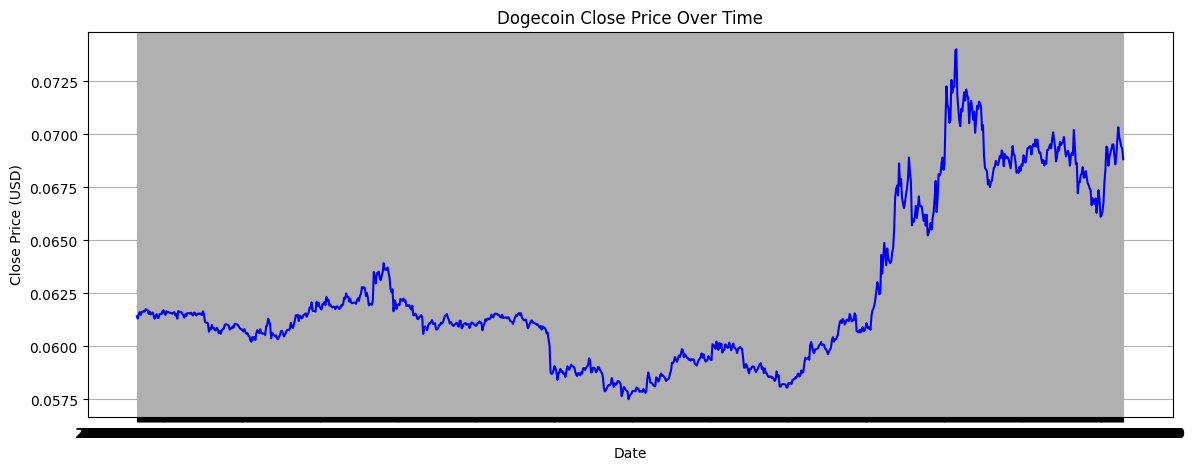

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['close'], color='blue')
plt.title('Dogecoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()


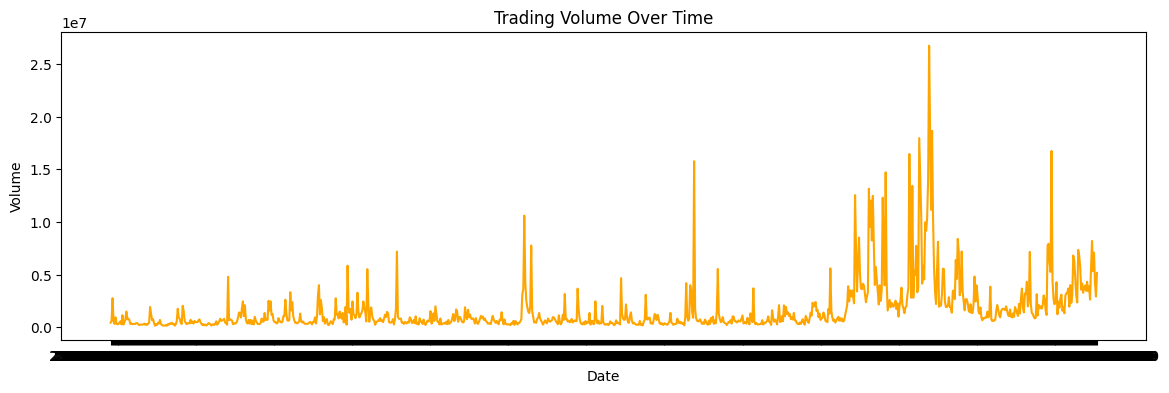

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['volume'], color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


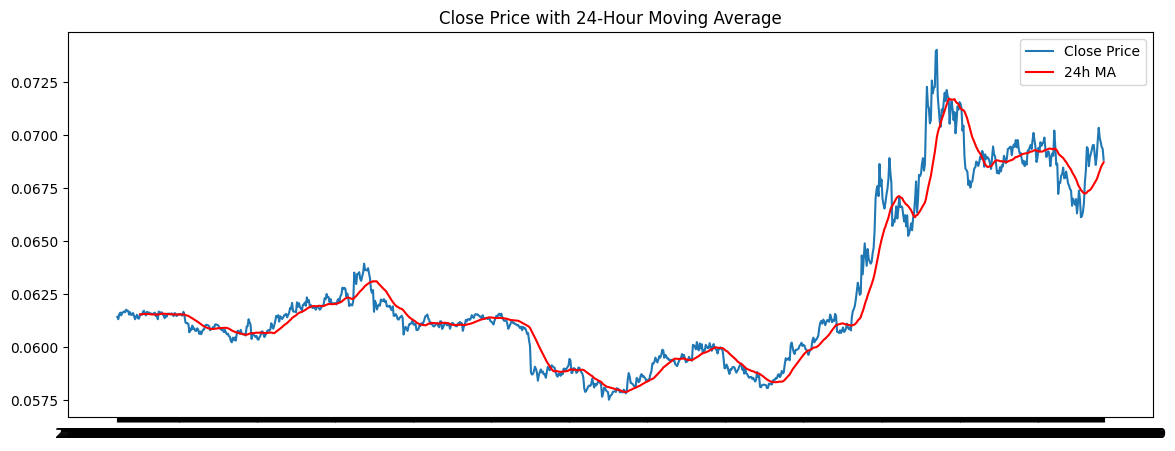

In [ ]:
df['MA_24'] = df['close'].rolling(window=24).mean()
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['close'], label='Close Price')
plt.plot(df['Date'], df['MA_24'], label='24h MA', color='red')
plt.title('Close Price with 24-Hour Moving Average')
plt.legend()
plt.show()


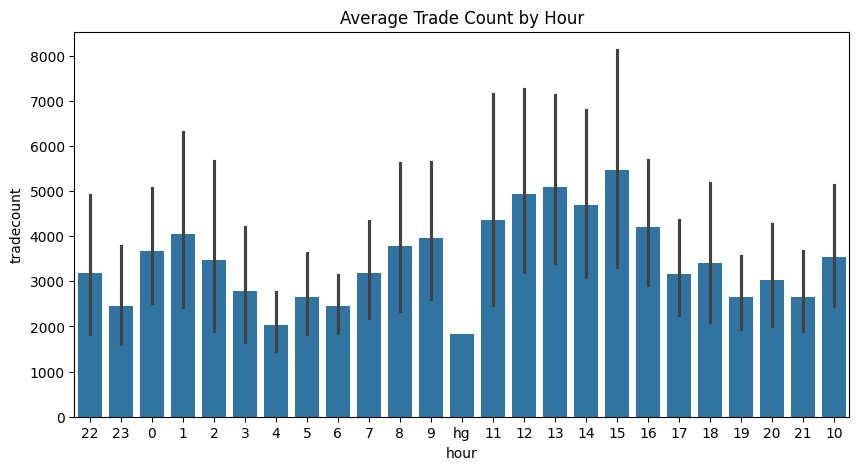

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='tradecount', data=df)
plt.title('Average Trade Count by Hour')
plt.show()


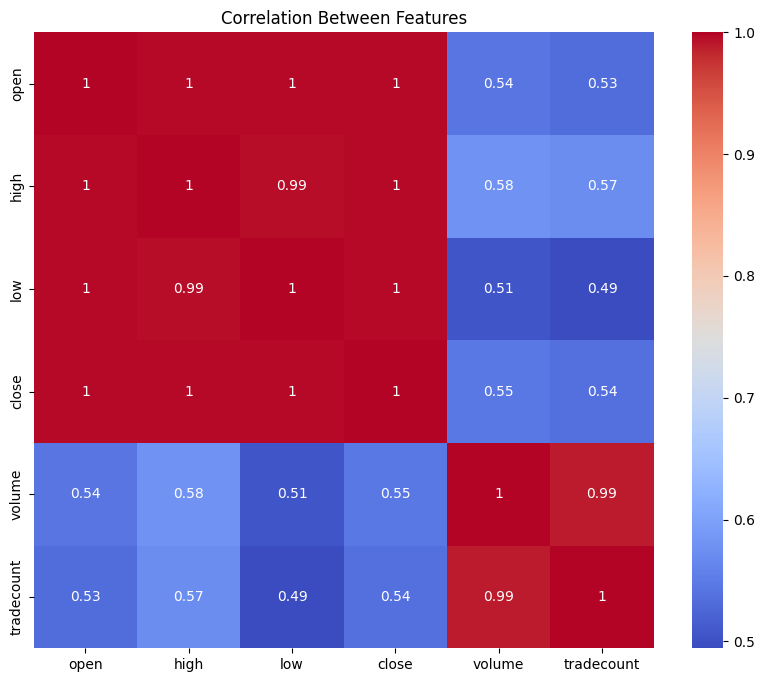

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume', 'tradecount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


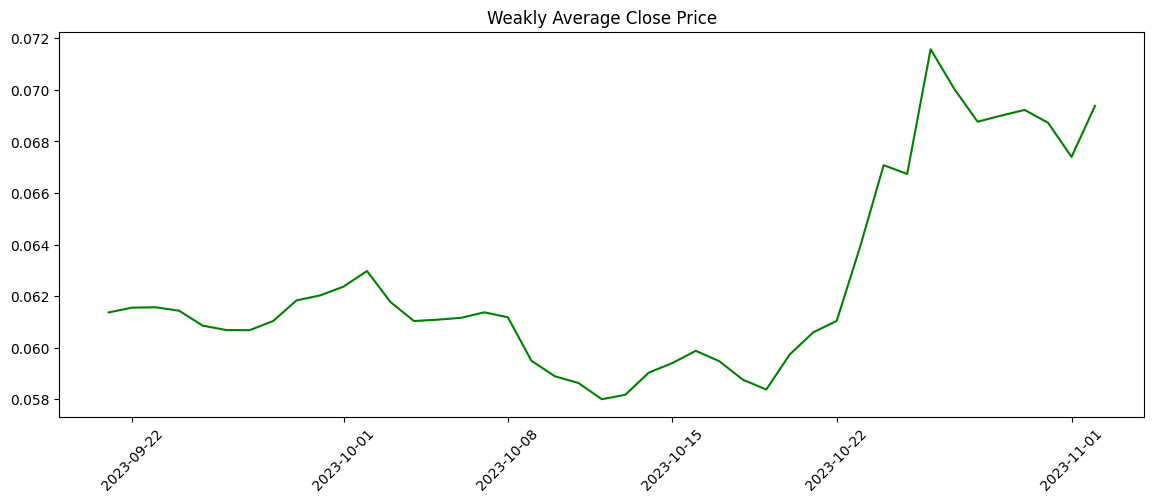

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
daily_price = df.groupby(df['Date'].dt.date)['close'].mean().reset_index()
plt.figure(figsize=(14, 5))
plt.plot(daily_price['Date'], daily_price['close'], color='green')
plt.title('Weakly Average Close Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['close'], mode='markers', name='Close Price'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['MA_24'], mode='markers', name='24h MA', marker=dict(color='red')))
fig.update_layout(
    title='Close Price and 24-Hour Moving Average (Scatter Plot)',
    xaxis_title='Date',
    yaxis_title='Close Price (USD)'
)

fig.show()